聚类——K-Means与DBSCAN原理和应用 https://zhuanlan.zhihu.com/p/38668500

Python图像处理丨基于K-Means聚类的图像区域分割 https://zhuanlan.zhihu.com/p/562957897

K-Means算法对于凸性数据具有良好的效果，能够根据距离来讲数据分为球状类的簇，但对于非凸形状的数据点，就无能为力了，比如环形数据等等，此时基于密度的算法DBSCAN就更令人满意了

基于距离的聚类算法比如K-Means有一个缺陷，就是对噪声特别敏感，而且往往聚类簇的形状是球状簇。而DBSCAN（Density-Based Spatial Clustering of Application with Noise）算法是一种基于密度的算法，它可以发现任意形状的聚类，这对于带有噪音点的数据起着重要的作用。

## K-Means 聚类

### K-Means聚类原理

K-Means聚类是最常用的聚类算法，最初起源于信号处理，其目标是将数据点划分为K个类簇，找到每个簇的中心并使其度量最小化。该算法的最大优点是简单、便于理解，运算速度较快，缺点是只能应用于连续型数据，并且要在聚类前指定聚集的类簇数。

下面是K-Means聚类算法的分析流程，步骤如下：

第一步，确定K值，即将数据集聚集成K个类簇或小组。

第二步，从数据集中随机选择K个数据点作为质心（Centroid）或数据中心。

第三步，分别计算每个点到每个质心之间的距离，并将每个点划分到离最近质心的小组，跟定了那个质心。

第四步，当每个质心都聚集了一些点后，重新定义算法选出新的质心。

第五步，比较新的质心和老的质心，如果新质心和老质心之间的距离小于某一个阈值，则表示重新计算的质心位置变化不大，收敛稳定，则认为聚类已经达到了期望的结果，算法终止。

第六步，如果新的质心和老的质心变化很大，即距离大于阈值，则继续迭代执行第三步到第五步，直到算法终止。

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

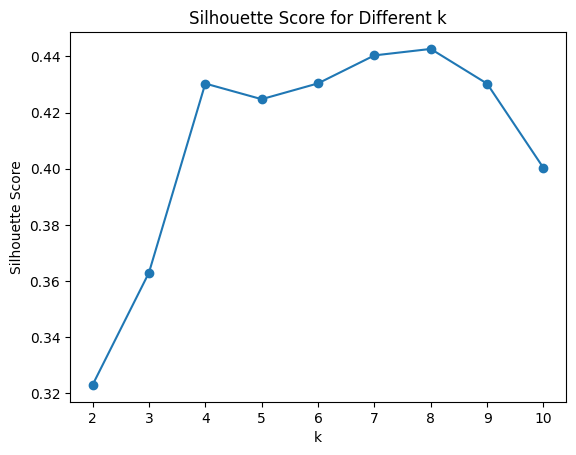

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from time import time

# 假定你已将上文的数据存储为'customer_data.csv'
data = pd.read_csv("customer_data.csv")
#----------------------------------------------------------------------
# 数据标准化
# 因为K-Means聚类是距离基础的算法，我们通常在进行聚类分析之前会标准化我们的数据。
#-------------------------------------------------------------------
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
#---------------------------------------------------------------------------------------
# 确定K值
# 这里我们使用轮廓系数（Silhouette Score）来帮助我们确定适当的K值
# 轮廓系数是在-1到1之间的，一个高的轮廓系数表明样本点离其他类的距离较远。
# https://blog.csdn.net/qq_19672707/article/details/106857918 (聚类效果评估——轮廓系数（Silhouette Coefficient）)
#----------------------------------------------------------------------------
k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different k')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


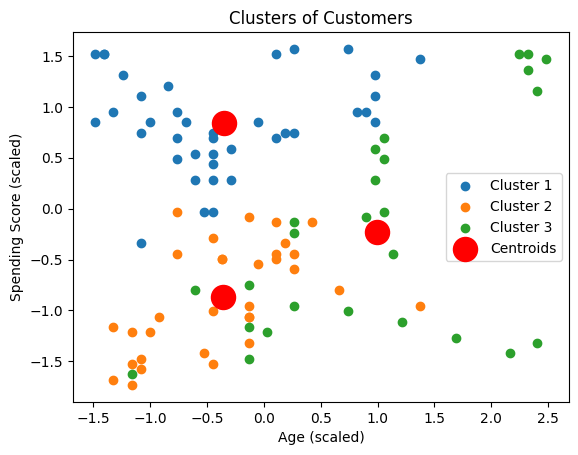

In [3]:
#--------------------------------------------------------------------------------
# 模型训练
# 从轮廓系数图中选择一个合适的 K 值进行模型训练，并可视化结果。
#--------------------------------------------------------------------------------
# 假设我们选择k=3
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# 可视化结果
plt.scatter(scaled_data[clusters == 0, 0], scaled_data[clusters == 0, 1], label='Cluster 1')
plt.scatter(scaled_data[clusters == 1, 0], scaled_data[clusters == 1, 1], label='Cluster 2')
plt.scatter(scaled_data[clusters == 2, 0], scaled_data[clusters == 2, 1], label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Age (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()

这三个群集可能分别代表以下客户类型：

Cluster 1: 年轻且花费适中的客户群体
Cluster 2: 年轻且花费较高的客户群体
Cluster 3: 年纪较大且花费较低的客户群体
商业决策将基于这些群体的特点来制定。例如，针对花费较高的年轻客户群体，可以提供最新的产品推广或者特殊折扣，以便进一步激励他们的购买行为。

以上代码及分析基于假定的数据。在现实项目中，要充分理解业务背景、数据的含义并根据业务目标来决定聚类的数量及如何解读各个群体的特征。

### K-Means聚类分割灰度图像

在图像处理中，通过K-Means聚类算法可以实现图像分割、图像聚类、图像识别等操作，本小节主要用来进行图像颜色分割。假设存在一张100×100像素的灰度图像，它由10000个RGB灰度级组成，我们通过K-Means可以将这些像素点聚类成K个簇，然后使用每个簇内的质心点来替换簇内所有的像素点，这样就能实现在不改变分辨率的情况下量化压缩图像颜色，实现图像颜色层级分割。

在OpenCV中，Kmeans()函数原型如下所示：

retval, bestLabels, centers = kmeans(data, K, bestLabels, criteria, attempts, flags[, centers])

data表示聚类数据，最好是np.flloat32类型的N维点集

K表示聚类类簇数

bestLabels表示输出的整数数组，用于存储每个样本的聚类标签索引

criteria表示算法终止条件，即最大迭代次数或所需精度。在某些迭代中，一旦每个簇中心的移动小于criteria.epsilon，算法就会停止

attempts表示重复试验kmeans算法的次数，算法返回产生最佳紧凑性的标签

flags表示初始中心的选择，两种方法是cv2.KMEANS_PP_CENTERS ;和cv2.KMEANS_RANDOM_CENTERS

centers表示集群中心的输出矩阵，每个集群中心为一行数据

下面使用该方法对灰度图像颜色进行分割处理，需要注意，在进行K-Means聚类操作之前，需要将RGB像素点转换为一维的数组，再将各形式的颜色聚集在一起，形成最终的颜色分割。

(600, 600)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20687 (\N{CJK UNIFIED IDEOGRAPH-50CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32858 (\N{CJK UNIFIED IDEOGRAPH-805A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

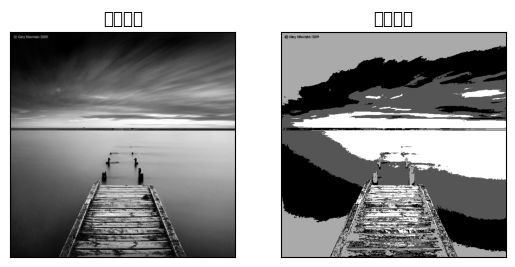

In [12]:
# coding: utf-8
import cv2
import numpy as np
import matplotlib.pyplot as plt
#读取原始图像灰度颜色
img = cv2.imread("/content/scenery.jpg", 0)
print(img.shape)
#获取图像高度、宽度
rows, cols = img.shape[:]
#图像二维像素转换为一维
data = img.reshape((rows * cols, 1))
data = np.float32(data)
#定义中心 (type,max_iter,epsilon)
criteria = (cv2.TERM_CRITERIA_EPS +
            cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
#设置标签
flags = cv2.KMEANS_RANDOM_CENTERS
#K-Means聚类 聚集成4类
compactness, labels, centers = cv2.kmeans(data, 4, None, criteria, 10, flags)
#生成最终图像
dst = labels.reshape((img.shape[0], img.shape[1]))
#用来正常显示中文标签
plt.rcParams['font.sans-serif']=['SimHei']
#显示图像
titles = [u'原始图像', u'聚类图像']
images = [img, dst]
for i in range(2):
 plt.subplot(1,2,i+1), plt.imshow(images[i], 'gray'),
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()


输出结果如图所示，左边为灰度图像，右边为K-Means聚类后的图像，它将灰度级聚集成四个层级，相似的颜色或区域聚集在一起。

### K-Means聚类对比分割彩色图像

(1457, 970, 3)


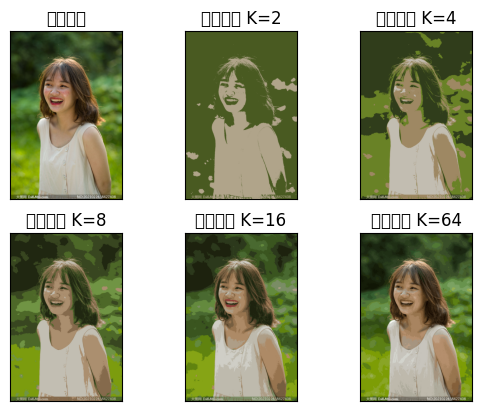

In [15]:
# coding: utf-8
import cv2
import numpy as np
import matplotlib.pyplot as plt

#读取原始图像
img = cv2.imread("/content/girl.jpg")
print(img.shape)

#图像二维像素转换为一维
data = img.reshape((-1,3))
data = np.float32(data)

#定义中心 (type,max_iter,epsilon)
criteria = (cv2.TERM_CRITERIA_EPS +
            cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

#设置标签
flags = cv2.KMEANS_RANDOM_CENTERS

#K-Means聚类 聚集成2类
compactness, labels2, centers2 = cv2.kmeans(data, 2, None, criteria, 10, flags)
#K-Means聚类 聚集成4类
compactness, labels4, centers4 = cv2.kmeans(data, 4, None, criteria, 10, flags)
#K-Means聚类 聚集成8类
compactness, labels8, centers8 = cv2.kmeans(data, 8, None, criteria, 10, flags)
#K-Means聚类 聚集成16类
compactness, labels16, centers16 = cv2.kmeans(data, 16, None, criteria, 10, flags)
#K-Means聚类 聚集成64类
compactness, labels64, centers64 = cv2.kmeans(data, 64, None, criteria, 10, flags)

#图像转换回uint8二维类型
centers2 = np.uint8(centers2)
res = centers2[labels2.flatten()]
dst2 = res.reshape((img.shape))
centers4 = np.uint8(centers4)
res = centers4[labels4.flatten()]
dst4 = res.reshape((img.shape))
centers8 = np.uint8(centers8)
res = centers8[labels8.flatten()]
dst8 = res.reshape((img.shape))
centers16 = np.uint8(centers16)
res = centers16[labels16.flatten()]
dst16 = res.reshape((img.shape))
centers64 = np.uint8(centers64)
res = centers64[labels64.flatten()]
dst64 = res.reshape((img.shape))

#图像转换为RGB显示
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
dst2 = cv2.cvtColor(dst2, cv2.COLOR_BGR2RGB)
dst4 = cv2.cvtColor(dst4, cv2.COLOR_BGR2RGB)
dst8 = cv2.cvtColor(dst8, cv2.COLOR_BGR2RGB)
dst16 = cv2.cvtColor(dst16, cv2.COLOR_BGR2RGB)
dst64 = cv2.cvtColor(dst64, cv2.COLOR_BGR2RGB)

#用来正常显示中文标签
plt.rcParams['font.sans-serif']=['SimHei']

#显示图像
titles = ['原始图像', '聚类图像 K=2', '聚类图像 K=4','聚类图像 K=8', '聚类图像 K=16', '聚类图像 K=64']
images = [img, dst2, dst4, dst8, dst16, dst64]
for i in range(6):
 plt.subplot(2,3,i+1), plt.imshow(images[i], 'gray'),
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


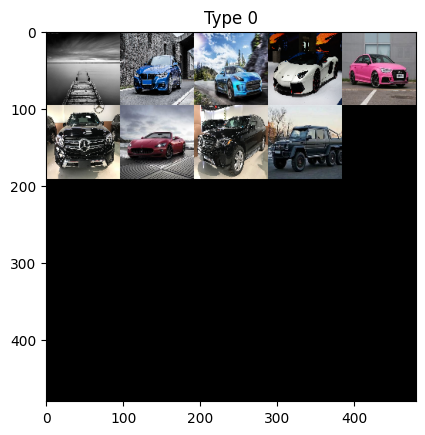

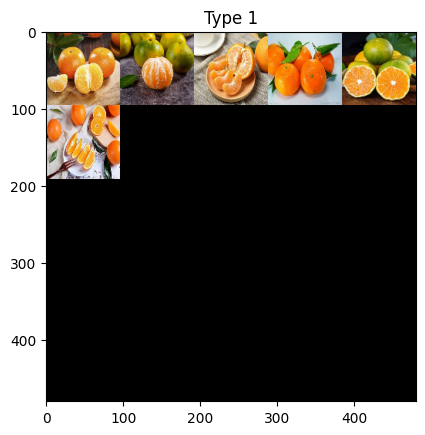

In [21]:
import os
import numpy as np
from sklearn.cluster import KMeans
import cv2
from imutils import build_montages
import torch.nn as nn
import torchvision.models as models
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        resnet50 = models.resnet50(pretrained=True)
        self.resnet = nn.Sequential(resnet50.conv1,resnet50.bn1,resnet50.relu,resnet50.maxpool,resnet50.layer1,resnet50.layer2,resnet50.layer3,resnet50.layer4)

    def forward(self, x):
        x = self.resnet(x)
        return x

net = Net().eval()

image_path = []
all_images = []
images = os.listdir("/content/images")

for image_name in images:
    image_path.append("/content/images/" + image_name)

for path in image_path:
    image = Image.open(path).convert("RGB")
    image = transforms.Resize([224,224])(image)
    image = transforms.ToTensor()(image)
    image = image.unsqueeze(0)
    image = net(image)
    image = image.reshape(-1, )
    all_images.append(image.detach().numpy())

clt = KMeans(n_clusters=2)
clt.fit(all_images)
labelIDs = np.unique(clt.labels_)

for labelID in labelIDs:
    idxs = np.where(clt.labels_ == labelID)[0]
    idxs = np.random.choice(idxs, size=min(25, len(idxs)), replace=False)
    show_box = []
    for i in idxs:
        image = cv2.imread(image_path[i])
        image = cv2.resize(image, (96, 96))
        show_box.append(image)

    montage = build_montages(show_box, (96, 96), (5, 5))[0]

    title = "Type {}".format(labelID)

    # 使用 Matplotlib 显示图像
    plt.figure()
    plt.imshow(cv2.cvtColor(montage, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()


### 总结

K-Means一个很大的缺陷就是对噪声或者离群点比较敏感，它无法区分出哪些是噪声或者离群点，只能给每一个数据点都判断出一个类别来，这样就会导致样本质心偏移，导致误判或者聚类紧密程度降低。

DBSCAN由于其基于密度的算法的优势，对于噪声点不那么敏感

## 层次聚类

为了便于展示，我们使用上文中的customer_data.csv数据。我们将使用层次聚类（Hierarchical Clustering）探索数据内在的群集结构。

关注的特征依然是Age, Annual_Income, 和Spending_Score。

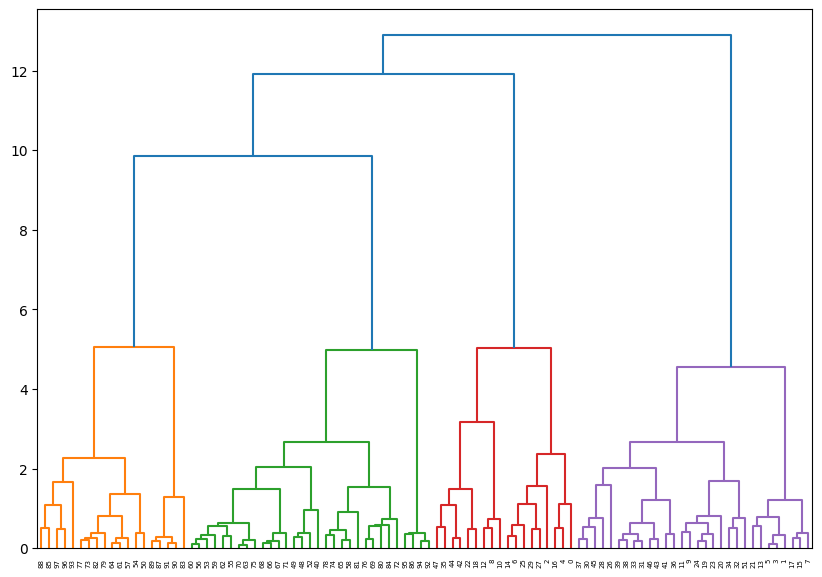

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# 读取数据
data = pd.read_csv("customer_data.csv")

# 数据标准化
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
#--------------------------------------------------------------------------
# 层次聚类模型
# 构建并可视化树状图 (Dendrogram)
# 用scipy中的linkage和dendrogram函数来构建层次聚类的树状图。
#--------------------------------------------------------------------------
linked = linkage(scaled_data, 'ward')  # 使用Ward连接方法

plt.figure(figsize=(10, 7))
dendrogram(linked,orientation='top',labels=data.index,distance_sort='descending',show_leaf_counts=True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


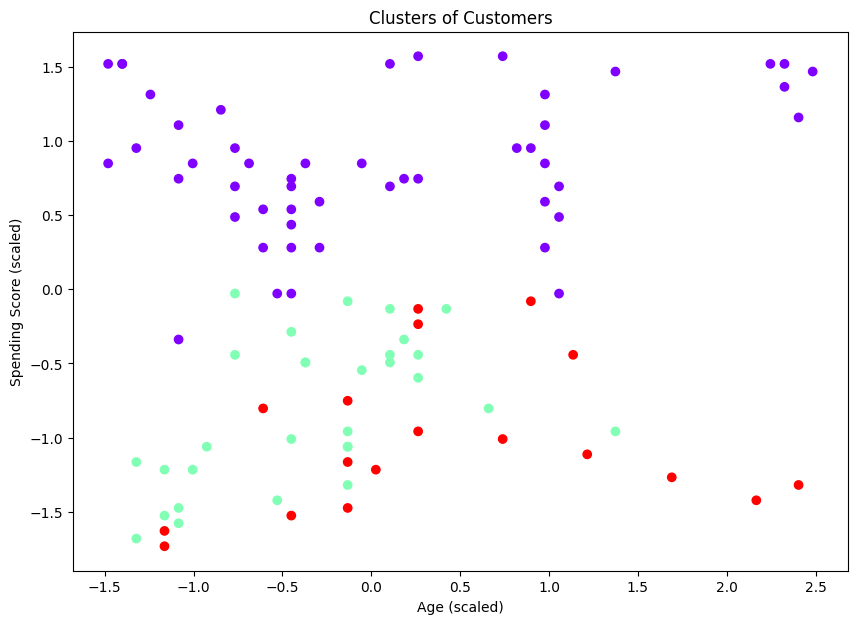

In [5]:
# 训练模型并可视化结果
# 选择一个合适的距离阈值或群集数量进行模型训练，并可视化结果。

# 定义模型并指定我们想要的群集数量
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

# 训练模型并预测标签
cluster_labels = cluster.fit_predict(scaled_data)

# 可视化结果
plt.figure(figsize=(10, 7))
plt.scatter(scaled_data[:,0], scaled_data[:,1], c=cluster_labels, cmap='rainbow')
plt.title('Clusters of Customers')
plt.xlabel('Age (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.show()

与K-Means聚类类似，我们可以根据生成的群集进行进一步分析。例如，每个群集的中心的特征可以被认为是该群集的“代表”特征。由于我们使用了相同的特征（Age和Spending_Score），群集的解释将与前文类似。

注意点

1、距离计算：affinity参数表示用于计算距离的方法。在本例中，我们使用了欧几里得距离。

2、链接方法：linkage参数表示用于链接群集的方法。在本例中，我们使用了Ward方法，该方法试图最小化群集内的方差。

3、选择群集数量：在生成的树状图中，通常选择一个“高度”来切割树形结构，并形成各个群集。在这个示例中，我们预先选择了群集的数量。在实际分析中，你也可以选择在树状图中一个合适的高度来切割群集。

## DBSCAN

Silhouette Score: 0.07


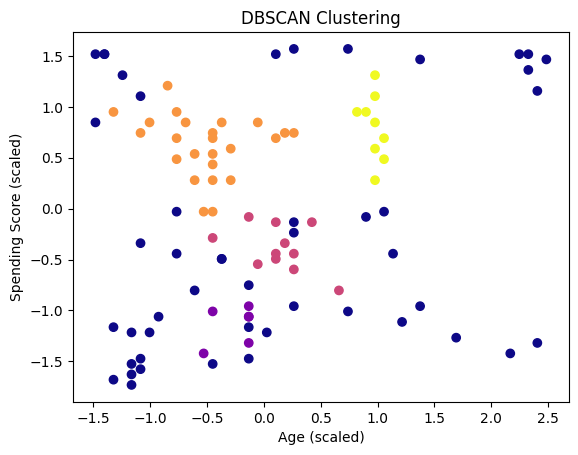

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

data = pd.read_csv("customer_data.csv")

# 使用StandardScaler进行标准化
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
# DBSCAN模型构建与训练
# 首先选定DBSCAN的两个主要参数：邻域大小（eps）和最小点数（min_samples）
# 实例化DBSCAN模型
dbscan = DBSCAN(eps=0.5, min_samples=5)
# 训练模型
clusters = dbscan.fit_predict(scaled_data)
# 计算轮廓系数
print(f'Silhouette Score: {silhouette_score(scaled_data, clusters):.2f}')
# 结果可视化
# 我们用散点图展示聚类的结果。
# 可视化
plt.scatter(scaled_data[:,0], scaled_data[:,1], c=clusters, cmap='plasma')
plt.title('DBSCAN Clustering')
plt.xlabel('Age (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.show()

轮廓系数：展示了群集的密度和分离度。范围从-1到1，值越高表明聚类效果越好。由于DBSCAN能够识别噪声，轮廓系数可能会受到噪声点的影响。

图形分析：可视化结果允许我们直观地看到不同的群集及其形状。DBSCAN能够找到非球形的群集，这是其独有的优点。

注意点

参数选择：
eps和min_samples的选择对模型影响很大。一个常见的方法是使用k-距离图("K-距离图"是一种用于数据聚类和分类的算法。它通过计算数据点之间的距离，并将它们表示为图中的节点和边来实现。K-距离图中的节点代表数据点，而边的权重表示这些数据点之间的距离。这种图可以帮助我们理解数据点之间的相似性和差异性，从而进行有效的数据分析和分类。)来估计eps。通常需要多次尝试来找到合适的参数。

标准化的重要性：由于DBSCAN依赖于距离的计算，所以标准化通常是必需的。

处理不均衡数据：DBSCAN可能在不同密度的群集之间表现不佳。在数据的分布非常不均匀时，可能需要调整参数或选择其他算法。

噪声点：DBSCAN将不属于任何群集的点归类为噪声（即，将其标签为-1）。在结果解释和进一步分析时需要注意这一点。

DBSCAN提供了一种不需要预先指定群集数量的聚类方法，并且可以找到复杂形状的群集。然而，它对参数的选择非常敏感，需要仔细进行调整和验证。

## 主成分分析

主成分分析（PCA）是一种在降维和可视化高维数据方面非常流行的技术。通过找到数据的主轴并将数据投影到这些轴上来减少数据的维度，从而尽可能保留数据的方差

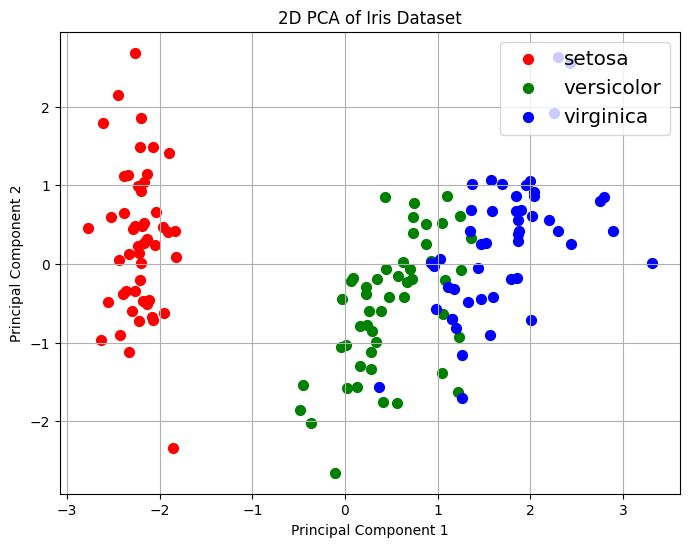

Explained variance: [0.72962445 0.22850762]


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

#-------------------------------------------------------------------------------
# 数据准备
# 假设我们有一个包含3个特征的 150x3 的数据集。
# 我们的目标是将这些数据从3D空间降维到2D空间以便进行可视化。
#-------------------------------------------------------------------------------
# 使用iris数据集
iris = load_iris()
X = iris.data  # 特征矩阵, shape: (150, 4)
y = iris.target  # 目标变量, shape: (150,)

# 标准化数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#-------------------------------------------------------------------------------
# 模型训练
#-------------------------------------------------------------------------------
# 实施PCA
pca = PCA(n_components=2)  # 我们将数据投影到前两个主成分
X_pca = pca.fit_transform(X_scaled)
#-------------------------------------------------------------------------------
# 数据可视化
#-------------------------------------------------------------------------------
# 创建一个新的figure
plt.figure(figsize=(8,6))

# 遍历标签，为不同的标签创建不同的散点图
for target, color in zip(iris.target_names, ['r', 'g', 'b']):
    indicesToKeep = iris.target == np.where(iris.target_names == target)[0][0]
    plt.scatter(X_pca[indicesToKeep, 0],
                X_pca[indicesToKeep, 1],
                c = color,
                s = 50)

# 增加图例和坐标轴的标签
plt.legend(iris.target_names, loc='upper right', fontsize='x-large')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Iris Dataset')
plt.grid(True)

# 显示图形
plt.show()
#--------------------------------------------------------------------------------------
# 解释方差
#-------------------------------------------------------------------------------
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance: {explained_variance}")

从上面的2D散点图中，你可以看到3种不同的鸢尾花在投影到前两个主成分上时是如何分开的。另外，解释的方差告诉我们前两个主成分保存了多少原始数据的方差。在许多情况下，希望这些主成分包含了足够多的信息，以便在丢失最小量的信息的情况下利用它们。

## 独立成分分析

独立成分分析是一种用于从混合信号中恢复原始信号的技术，通常用于盲源分离和信号处理。

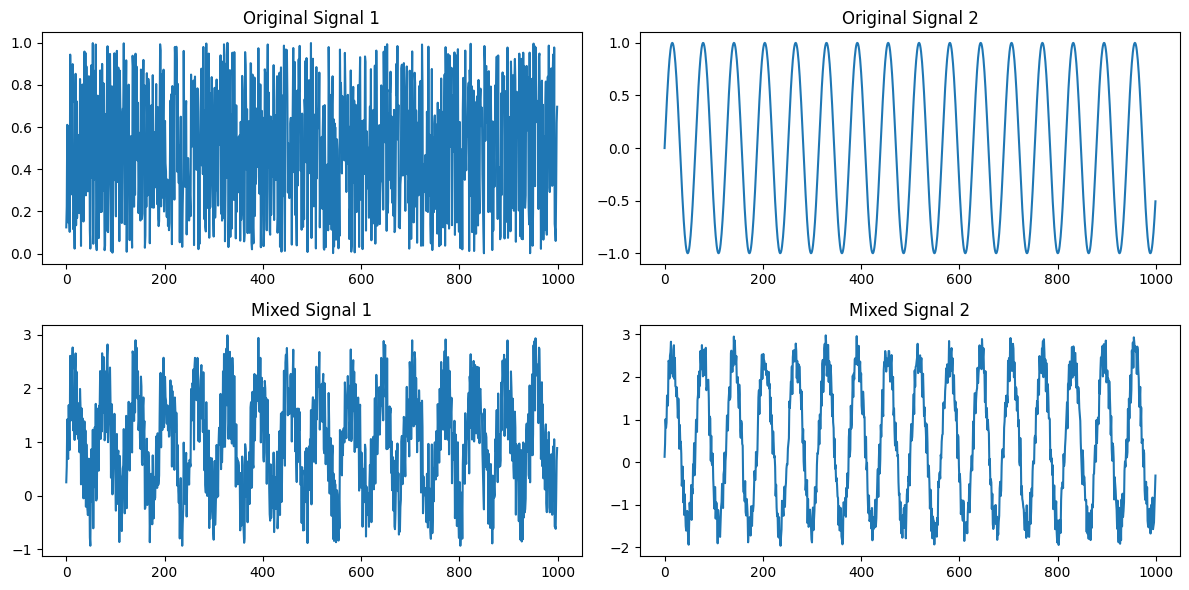

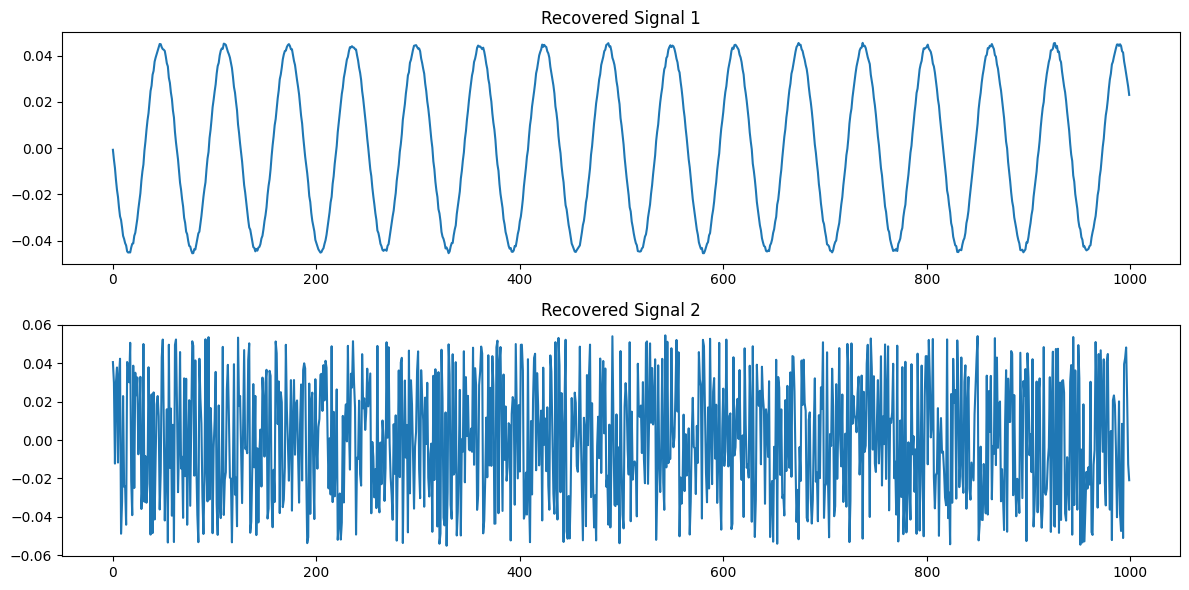

In [25]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")


# 数据准备
# 首先，我们需要准备一个包含混合信号的虚拟数据集。
# 以下示例中，创建两个独立的信号并将它们线性混合。

# 创建两个独立的信号
signal_1 = np.random.rand(1000)
signal_2 = np.sin(np.linspace(0, 100, 1000))

# 创建混合信号
mixing_matrix = np.array([[2, 1], [1, 2]])  # 混合矩阵
mixed_signals = np.dot(np.vstack((signal_1, signal_2)).T, mixing_matrix.T)

# ICA模型训练#

# 使用Scikit-Learn中的FastICA来拟合ICA模型，以恢复原始信号。

from sklearn.decomposition import FastICA

ica = FastICA(n_components=2)
recovered_signals = ica.fit_transform(mixed_signals)

# 绘制混合信号和恢复信号的图形

import matplotlib.pyplot as plt

# 绘制混合信号
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(signal_1, label='Signal 1')
plt.title('Original Signal 1')
plt.subplot(2, 2, 2)
plt.plot(signal_2, label='Signal 2')
plt.title('Original Signal 2')

# 绘制混合信号
plt.subplot(2, 2, 3)
plt.plot(mixed_signals[:, 0], label='Mixed Signal 1')
plt.title('Mixed Signal 1')
plt.subplot(2, 2, 4)
plt.plot(mixed_signals[:, 1], label='Mixed Signal 2')
plt.title('Mixed Signal 2')

plt.tight_layout()

# 绘制恢复信号
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(recovered_signals[:, 0], label='Recovered Signal 1')
plt.title('Recovered Signal 1')
plt.subplot(2, 1, 2)
plt.plot(recovered_signals[:, 1], label='Recovered Signal 2')
plt.title('Recovered Signal 2')

plt.tight_layout()
plt.show()


示例演示了独立成分分析的用途，如何准备数据，训练模型以及通过图形可视化来理解分离效果。在实际应用中，你可以使用不同数量的混合信号和独立成分来执行ICA，以满足具体的应用需求。

## 高斯混合模型


高斯混合模型是一种用于建模多个高斯分布混合在一起的概率模型。

下面是一个关于高斯混合模型的完整示例，包括数据准备、模型训练、Python代码和图形展示等等。

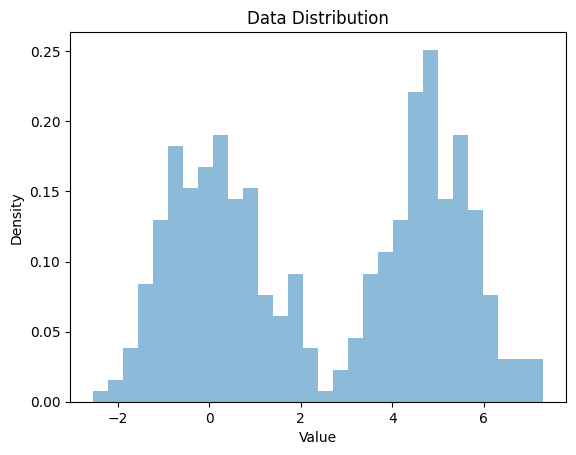

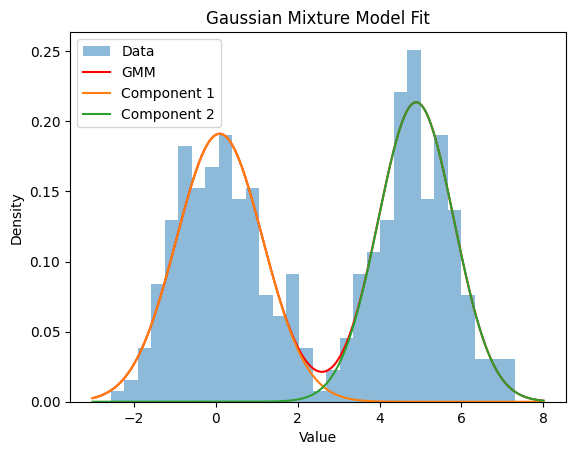

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# 创建两个高斯分布的虚拟数据集
np.random.seed(0)
data1 = np.random.normal(0, 1, 200)
data2 = np.random.normal(5, 1, 200)
data = np.concatenate((data1, data2), axis=0)

# 绘制数据分布
plt.hist(data, bins=30, density=True, alpha=0.5)
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()


# 使用GMM拟合数据
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(data.reshape(-1, 1))


# 绘制数据分布
plt.hist(data, bins=30, density=True, alpha=0.5, label='Data')

# 绘制GMM模型的拟合曲线
x = np.linspace(-3, 8, 1000)
pdf = np.exp(gmm.score_samples(x.reshape(-1, 1)))
plt.plot(x, pdf, '-r', label='GMM')

# 绘制每个高斯分布的拟合曲线
for i in range(2):
    mean = gmm.means_[i][0]
    variance = np.sqrt(gmm.covariances_[i][0][0])
    weight = gmm.weights_[i]
    plt.plot(x, weight * np.exp(-(x - mean)**2 / (2 * variance**2)) / (np.sqrt(2 * np.pi) * variance),
             label=f'Component {i+1}')

plt.title('Gaussian Mixture Model Fit')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

使用高斯混合模型来对数据进行建模和拟合，以及如何通过图形可视化来理解模型的效果。在实际应用中，你可以根据数据的特性和需求选择不同数量的高斯分布成分来建立更复杂的模型